In [1]:
#PDR Spatial Analysis

In [2]:
#Attempting to map the filtered PDR data

In [1]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
parceldata = gpd.read_file('filteredFAR.csv')

In [6]:
#Seeing whether the csv file is being read correctly

In [3]:
type(parceldata)

geopandas.geodataframe.GeoDataFrame

In [4]:
parceldata.head()

,field_1,farvalue,geometry,finzone2,parcelno2,landvalue,buildingsf,landarea,geometry
0,69876,0.0,MULTIPOLYGON (((-122.41651291865504 37.7653523...,PDR1G,3552013,155228.0,0.0,13198.0,MULTIPOLYGON (((-122.41651291865504 37.7653523...
1,85024,0.0,MULTIPOLYGON (((-122.40073091256717 37.7644461...,PDR1G,3980009,4415625.0,0.0,32224.0,MULTIPOLYGON (((-122.40073091256717 37.7644461...
2,85308,0.2996969156712426,MULTIPOLYGON (((-122.41260022552292 37.7659612...,PDR1G,3926001,1901241.0,5043.0,16827.0,MULTIPOLYGON (((-122.41260022552292 37.7659612...
3,89740,0.0,MULTIPOLYGON (((-122.41131829433732 37.7676943...,PDR1G,3923007,11196200.0,0.0,14806.0,MULTIPOLYGON (((-122.41131829433732 37.7676943...
4,92463,0.0,MULTIPOLYGON (((-122.39862726743131 37.7664296...,PDR1D,3821008,1697664.0,0.0,23642.0,MULTIPOLYGON (((-122.39862726743131 37.7664296...


In [9]:
type(parceldata.geometry)

geopandas.geoseries.GeoSeries

In [10]:
#Fixing glitch where geometry column is repeated

In [3]:
parceldatanew = gpd.read_file("filteredFAR.csv", GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [12]:
parceldatanew.head()

,field_1,farvalue,finzone2,parcelno2,landvalue,buildingsf,landarea,geometry
0,69876,0.0,PDR1G,3552013,155228.0,0.0,13198.0,(POLYGON ((-122.416512918655 37.76535232313464...
1,85024,0.0,PDR1G,3980009,4415625.0,0.0,32224.0,(POLYGON ((-122.4007309125672 37.7644461627368...
2,85308,0.2996969156712426,PDR1G,3926001,1901241.0,5043.0,16827.0,(POLYGON ((-122.4126002255229 37.7659612014299...
3,89740,0.0,PDR1G,3923007,11196200.0,0.0,14806.0,(POLYGON ((-122.4113182943373 37.7676943093722...
4,92463,0.0,PDR1D,3821008,1697664.0,0.0,23642.0,(POLYGON ((-122.3986272674313 37.7664296926000...


In [14]:
parceldatanew.sample(n=4)

,field_1,farvalue,finzone2,parcelno2,landvalue,buildingsf,landarea,geometry
6,96015,0.0687,PDR1G,4228018,490212.0,687.0,10000.0,(POLYGON ((-122.390411288062 37.75488265831153...
4,92463,0.0,PDR1D,3821008,1697664.0,0.0,23642.0,(POLYGON ((-122.3986272674313 37.7664296926000...
3,89740,0.0,PDR1G,3923007,11196200.0,0.0,14806.0,(POLYGON ((-122.4113182943373 37.7676943093722...
0,69876,0.0,PDR1G,3552013,155228.0,0.0,13198.0,(POLYGON ((-122.416512918655 37.76535232313464...


In [ ]:
parceldatanew.info()

In [ ]:
#Testing whether I can map the parcel data

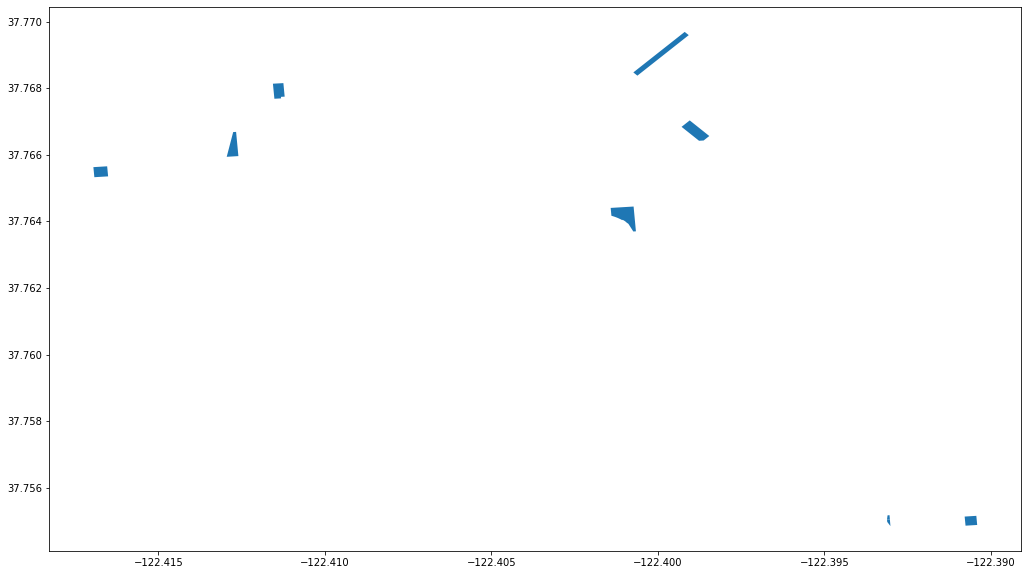

In [4]:
#All PDR zoned parcels in SF

parceldatanew.plot(figsize=(20,10))

plt.show()

In [ ]:
#mapping using geoplot

In [5]:
%%capture
!pip install geoplot;

In [6]:
import geoplot

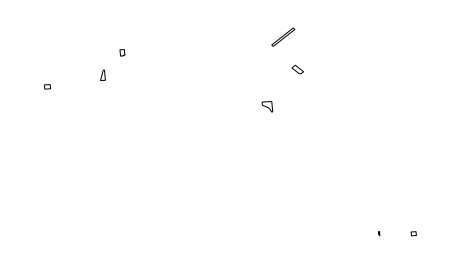

In [7]:
geoplot.polyplot(parceldatanew)

plt.show()

In [ ]:
#fixing formatting

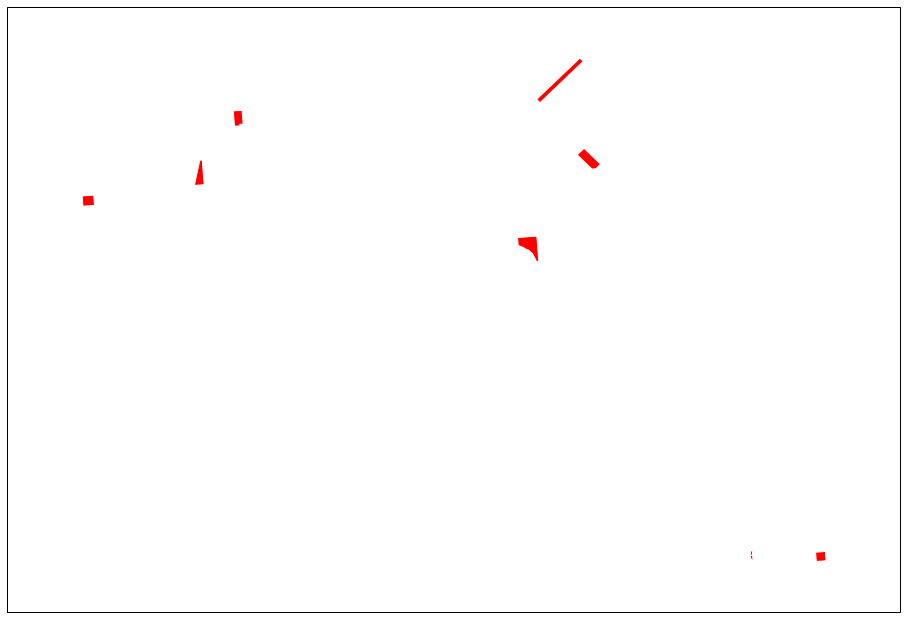

In [8]:
ax = geoplot.polyplot(parceldatanew, facecolor='red', linewidth=1, edgecolor='white', figsize=(16, 20), projection=geoplot.crs.Robinson())

ax.outline_patch.set_visible(True)  
plt.show()

In [ ]:
#retrieving zoning district shapefile to use as a base

In [9]:
import requests
url = 'https://data.sfgov.org/api/geospatial/9pf7-mty8?method=export&format=Shapefile'

with open('Zoning Map - Zoning Districts.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)



In [11]:
zoningdistlines = gpd.read_file('zip://Zoning Map - Zoning Districts.zip')

In [21]:
zoningdistlines.head()


,codesectio,commercial,districtna,gen,objectid,shape_area,shape_leng,url,zoning,zoning_sim,geometry
0,209.1,6:00AM-10:00PM,"RESIDENTIAL- HOUSE, TWO FAMILY",Residential,19300.0,2.030783e-06,0.009195,https://codelibrary.amlegal.com/codes/san_fran...,RH-2,RH-2,"POLYGON ((-122.430526834 37.722469476, -122.43..."
1,211,Unrestricted,PUBLIC,Public,20263.0,1.042228e-07,0.001303,https://codelibrary.amlegal.com/codes/san_fran...,P,P,"POLYGON ((-122.438509606 37.721232545, -122.43..."
2,209.2,6:00AM-10:00PM,"RESIDENTIAL- MIXED, LOW DENSITY",Residential,19971.0,5.019779e-07,0.003016,https://codelibrary.amlegal.com/codes/san_fran...,RM-1,RM-1,"POLYGON ((-122.435249516 37.763363106, -122.43..."
3,847,Unrestricted,RESIDENTIAL ENCLAVE-MIXED,Mixed Use,20472.0,3.563539e-07,0.002518,https://codelibrary.amlegal.com/codes/san_fran...,RED-MX,RED-MX,"POLYGON ((-122.414154717 37.775113424, -122.41..."
4,211,Unrestricted,PUBLIC,Public,20205.0,7.205657e-07,0.003926,https://codelibrary.amlegal.com/codes/san_fran...,P,P,"POLYGON ((-122.419818481 37.754952718, -122.41..."


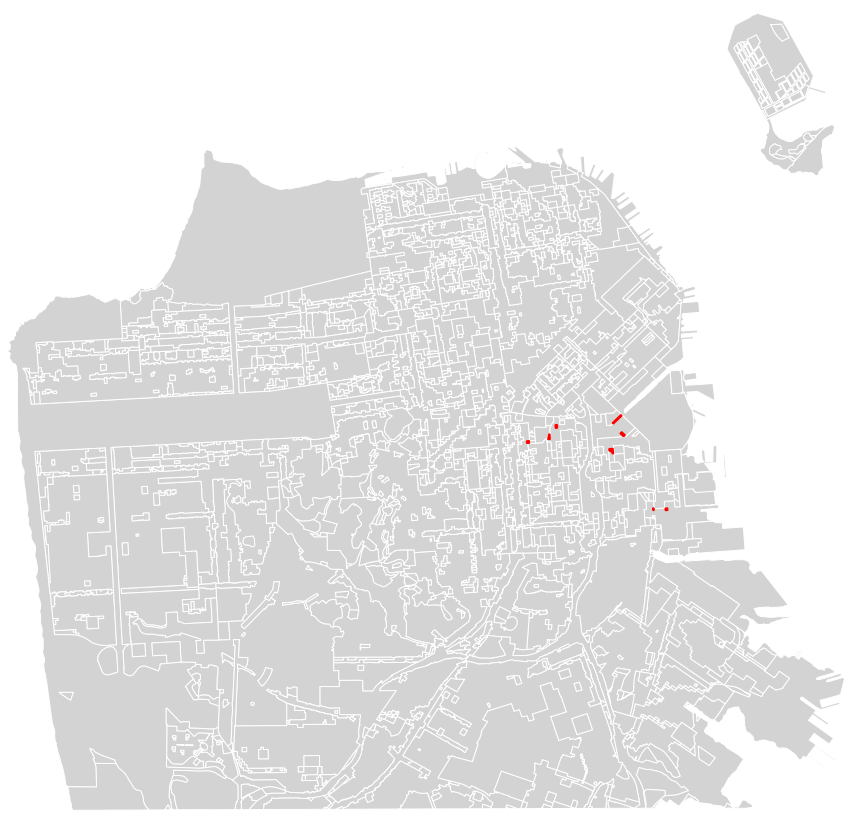

In [43]:
# Plot the zoning district outlines 
ax = geoplot.polyplot(zoningdistlines, facecolor='lightgrey', linewidth=1, edgecolor='white',
                      projection=geoplot.crs.Robinson(), figsize=(15,20))  

# Overlay the PDR data
geoplot.polyplot(parceldatanew, facecolor='red', linewidth=2, edgecolor='red', projection=geoplot.crs.Robinson(), extent=zoningdistlines.total_bounds, ax = ax)

plt.show()

In [19]:
#keeping the data cleaning and converting below for future reference
#Looking at my filtered data more closely, a lot of the numerical data is not registering properly
#parceldatanew.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
field_1       9 non-null object
farvalue      9 non-null object
finzone2      9 non-null object
parcelno2     9 non-null object
landvalue     9 non-null object
buildingsf    9 non-null object
landarea      9 non-null object
geometry      9 non-null object
dtypes: object(8)
memory usage: 656.0+ bytes
